In [398]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve


# plt.style.use('ggplot')
data = pd.read_csv("./kaggle/dataset_malwares.csv")
data_test = pd.read_csv("./kaggle/dataset_test.csv")
data.head()

# data.drop(data[67])

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


In [399]:
# data.columns
# data.columns[67]
# a = data.drop(data.columns[67], axis=0)
# a['SectionMaxPointerData']

#### 2. Проанализируйте датасет.
 Опишите его характеристики: имеющиеся колонки, размер. Преобразуйте датасет, приведя все данные к виду, пригодному для последующей обработки (колонки, содержащие дату и время, строковые некатегориальные значения и т.д.). Отобразите корреляционную матрицу. Предложите варианты по расширению датасета (то есть каким образом можно было бы собрать больше данных в исследуемой предметной области). 

In [400]:
print("Размер датасета:", data.shape)
print("Колонки датасета:", data.columns.tolist())
data.info()
print(data.describe())

Размер датасета: (19611, 79)
Колонки датасета: ['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr', 'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs', 'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine', 'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable', 'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders', 'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware', 'SuspiciousImportFunctions', 'SuspiciousNameSection', 'Sec

In [401]:
data.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


Преобразуйте датасет, приведя все данные к виду, пригодному для последующей обработки (колонки, содержащие дату и время, строковые некатегориальные значения и т.д.). Отобразите корреляционную матрицу

In [402]:
# data['TimeDateStamp'] = pd.to_datetime(data['TimeDateStamp'], errors='coerce', unit='s')

In [403]:
import numpy as np


print("Columns having only 1 unique Value")
drop_columns = ['Name', 'Malware', 'TimeDateStamp']
unique_columns = [col for col in data if data[col].nunique() == 1]
for col in unique_columns:
    drop_columns.append(col)
    
print(*drop_columns)
malware_indices = data[data['Malware'] == 1].index


np.random.seed(42)  
indices_to_remove = np.random.choice(malware_indices, size=8000, replace=False)

data_cleaned = data.drop(indices_to_remove)

X_train = data_cleaned.drop(drop_columns, axis=1)
Y_train = data_cleaned['Malware']

Columns having only 1 unique Value
Name Malware TimeDateStamp e_magic SectionMaxEntropy SectionMaxRawsize SectionMaxVirtualsize SectionMinPhysical SectionMinVirtual SectionMinPointerData SectionMainChar


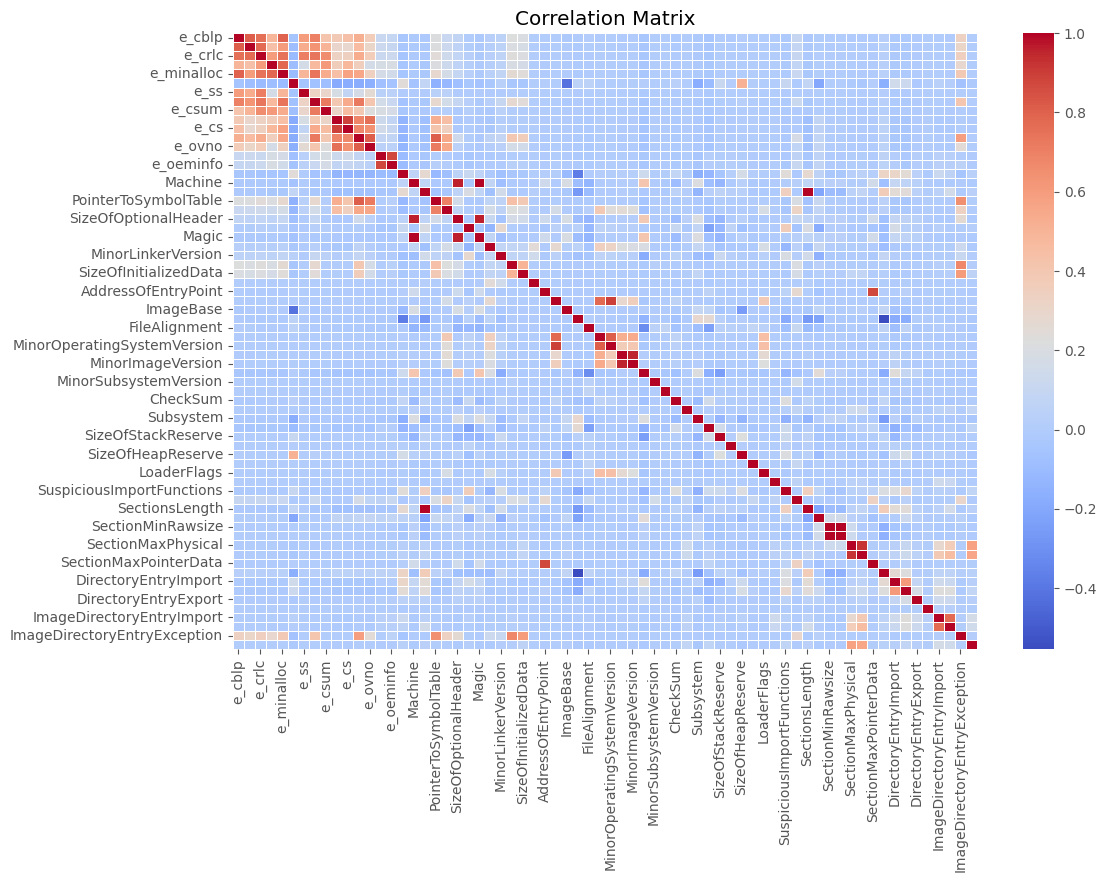

In [404]:
corr_matrix = X_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [405]:
high_corr_columns = ['e_cblp', 'e_minalloc', 'MajorOperatingSystemVersion',
                     'DirectoryEntryImportSize', 'SectionsLength',
                     'SectionMinRawsize', 'SectionMaxPhysical', 'Machine',
                     ]

# a = data.drop( ['MajorSubsystemVersion', 'MajorLinkerVersion', 'SizeOfCode', 'SizeOfImage', 'SizeOfHeaders', 'SizeOfInitializedData', 
#            'SizeOfUninitializedData', 'SizeOfStackReserve', 'SizeOfHeapReserve', 
#             'NumberOfSymbols', 'SectionMaxChar'], axis=1)
# print(a.columns)
# high_corr_columns = []
X_train=X_train.drop(high_corr_columns, axis=1)

seaborn.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)

Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

Note that histplot() function offers similar functionality with additional features (e.g. bar stacking), although its default behavior is somewhat different.

See the tutorial for more information.

[Text(0, 0, 'Benign'), Text(1, 0, 'Malware')]

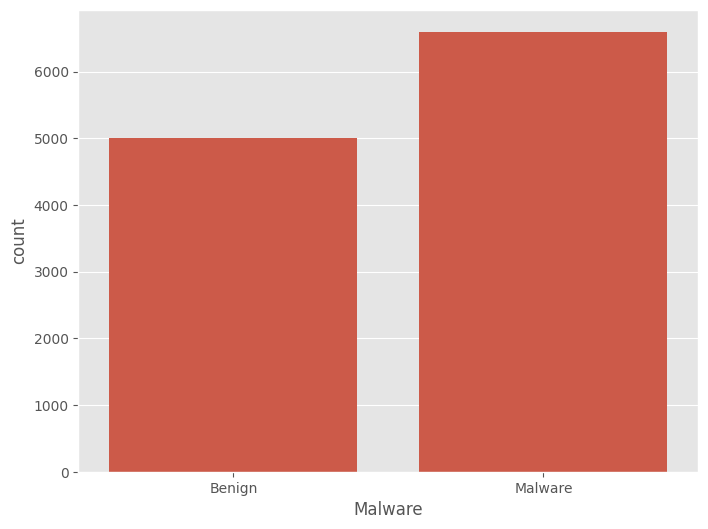

In [406]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(x=data_cleaned['Malware'])
ax.set_xticks([0, 1])
ax.set_xticklabels(['Benign', 'Malware'])

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=30)

In [408]:
X_train.shape

(9288, 60)

In [409]:
y_train.head()

19163    0
10042    1
6962     1
11333    1
15706    0
Name: Malware, dtype: int64

In [410]:
# X_test=data_test.drop([*drop_columns, *high_corr_columns], axis=1)
# Y_test = data_test['Malware']

In [411]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16, class_weight='balanced')
# X_train.head()
# y_train.head()
rfc.fit(X_train, y_train)
# y_pred_prob_rfc = rfc.predict_proba(X_test)[:, 1]
# precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_rfc)


RandomForestClassifier(class_weight='balanced', max_depth=16, oob_score=True,
                       random_state=0)

Precision:
 правильно предсказанных объектов класса среди всех объектов, которые модель отнесла к этому классу.

Precision = tp / tp + fp

recall :
Доля правильно предсказанных объектов класса среди всех реальных объектов этого класса.

recall = tp / tp + fn

F1-Score
Гармоническое среднее между Precision и Recall. Полезен при дисбалансе классов.

Accuracy (Общая точность)
Что показывает: Доля всех верных предсказаний модели.


In [412]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.99      0.98      0.99       975
     Malware       0.99      0.99      0.99      1348

    accuracy                           0.99      2323
   macro avg       0.99      0.99      0.99      2323
weighted avg       0.99      0.99      0.99      2323



TN  FP 

FN  TP


TP - true positive 
TN - true negative
FP - false positive 
FN - false negative


Все что true - правильно предсказанный результат 

Text(50.722222222222214, 0.5, 'True labels')

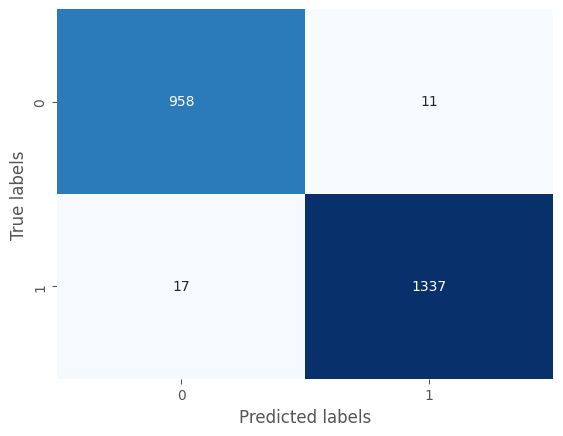

In [413]:
ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [414]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 40), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_nn = mlp.predict(X_test)

In [415]:
print("\nNeural Network Metrics:")
print(classification_report(y_test, y_pred_nn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))


Neural Network Metrics:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       975
           1       0.88      0.89      0.89      1348

    accuracy                           0.87      2323
   macro avg       0.87      0.87      0.87      2323
weighted avg       0.87      0.87      0.87      2323

Confusion Matrix:
[[ 817  158]
 [ 143 1205]]


Вариант, как понять ROC-кривую: она описывает взаимосвязь между чувствительностью модели (TPR, или true positives rate — доля истинно положительных примеров) и её специфичностью (описываемой в отношении долей ложноположительных результатов: 1-FPR).

С такой классической визуализацией до меня дошло первое представление, а именно: идеальная модель — та, в которой доля истинно положительных результатов максимально высока, в то же время доля ложно положительных результатов удерживается как можно ниже.

src: https://habr.com/ru/companies/netologyru/articles/582756/

In [416]:
# ROC-кривые
y_pred_prob_rfc = rfc.predict_proba(X_test)[:, 1]
y_pred_prob_nn = mlp.predict_proba(X_test)[:, 1]

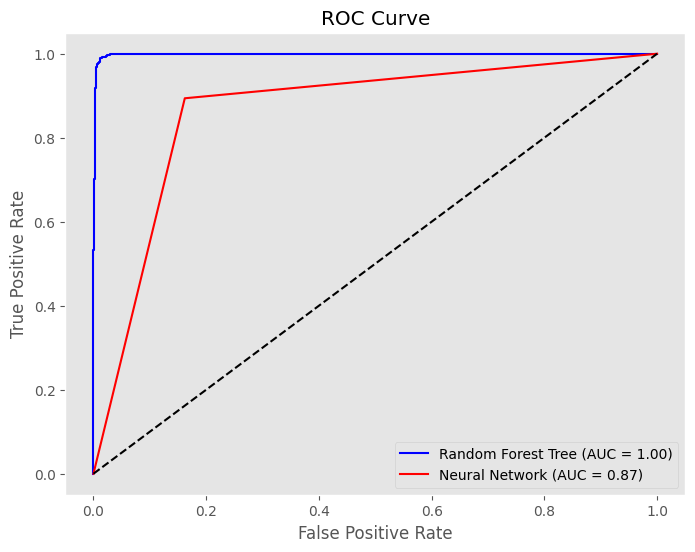

In [417]:
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_prob_rfc)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest Tree (AUC = {roc_auc_rfc:.2f})', color='blue')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Линия случайной модели
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

recall = tp / tp + fn
fpr = fr / fp + tn 

Показывает, какую долю реальных отрицательных классов модель ошибочно предсказала как положительные.

In [418]:
pkl_filename = "rf_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)


In [419]:
# importance = rfc.feature_importances_
# importance_dict = {data.columns.values[i]: importance[i] for i in range (len(importance))}
# sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
# plt.figure(figsize=(10, 20))
# sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
# plt.title('Features importance')

